In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [3]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Apply label encoding to all categorical columns
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Create a dictionary to store LabelEncoder objects
label_encoders = {}

# Encode each categorical column and store the LabelEncoder objects
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Define features (X) and target (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# First split to separate out the test set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split to separate out the training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform training, validation, and test data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Neural Network Architecture with Dropout
class HeartDiseaseNet(nn.Module):
    def __init__(self):
        super(HeartDiseaseNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)  # Input layer to first hidden layer
        self.dropout1 = nn.Dropout(0.25)            # Dropout layer after first hidden layer
        self.fc2 = nn.Linear(64, 32)               # First hidden layer to second hidden layer
        self.dropout2 = nn.Dropout(0.25)            # Dropout layer after second hidden layer
        self.fc3 = nn.Linear(32, 1)                # Second hidden layer to output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))                   # ReLU activation function on first hidden layer
        x = self.dropout1(x)                      # Apply dropout
        x = F.relu(self.fc2(x))                   # ReLU activation function on second hidden layer
        x = self.dropout2(x)                      # Apply dropout
        x = torch.sigmoid(self.fc3(x))            # Sigmoid activation function on output layer
        return x

# Create an instance of the network
net = HeartDiseaseNet()

Epoch [1/500], Training Loss: 0.6931, Validation Loss: 0.6867
Epoch [26/500], Training Loss: 0.3954, Validation Loss: 0.2855
Epoch [51/500], Training Loss: 0.3621, Validation Loss: 0.2669
Epoch [76/500], Training Loss: 0.3443, Validation Loss: 0.2577
Epoch [101/500], Training Loss: 0.3171, Validation Loss: 0.2542
Epoch [126/500], Training Loss: 0.3085, Validation Loss: 0.2556
Epoch [151/500], Training Loss: 0.3148, Validation Loss: 0.2517
Epoch [176/500], Training Loss: 0.3034, Validation Loss: 0.2490
Epoch [201/500], Training Loss: 0.2808, Validation Loss: 0.2485
Epoch [226/500], Training Loss: 0.2864, Validation Loss: 0.2534
Epoch [251/500], Training Loss: 0.2808, Validation Loss: 0.2506
Epoch [276/500], Training Loss: 0.2607, Validation Loss: 0.2461
Epoch [301/500], Training Loss: 0.2728, Validation Loss: 0.2488
Epoch [326/500], Training Loss: 0.2423, Validation Loss: 0.2516
Epoch [351/500], Training Loss: 0.2547, Validation Loss: 0.2496
Epoch [376/500], Training Loss: 0.2338, Valid

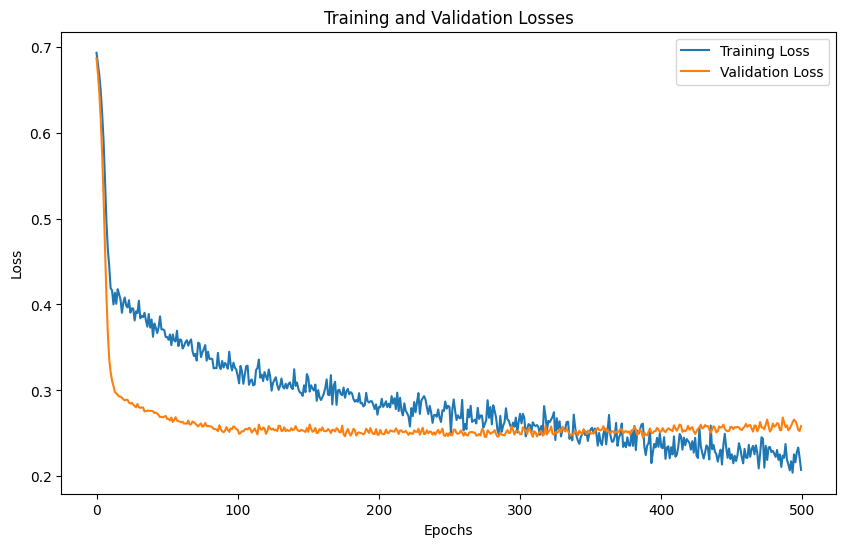

In [7]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Convert scaled data into PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


# Create TensorDatasets and DataLoaders for training and validation sets
train_data = TensorDataset(X_train_tensor, y_train_tensor)
val_data = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)

# Define the loss function and the optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


# Function to calculate the loss on the validation set
def validation_loss(net, criterion, val_loader):
    total_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
    return total_loss / len(val_loader)

# Convert validation data to DataLoader
val_data = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_data, batch_size=64)

# Lists to keep track of losses
train_losses, val_losses = [], []

# Training Loop
num_epochs = 500
for epoch in range(num_epochs):
    net.train()  # Set the network to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate training loss for this epoch
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Calculate validation loss
    net.eval()  # Set the network to evaluation mode
    val_loss = validation_loss(net, criterion, val_loader)
    val_losses.append(val_loss)

    # Print statistics
    if (epoch%25)==0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# Plotting the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to predict and evaluate on test data
def evaluate_on_test(net, test_loader):
    net.eval()  # Set the network to evaluation mode
    y_pred, y_true = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = net(inputs)
            predicted = (outputs.data > 0.5).float()  # Convert probabilities to binary predictions
            y_pred.extend(predicted.numpy())
            y_true.extend(labels.numpy())
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)

    return accuracy, conf_matrix, class_report

# Convert test data to DataLoader
test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=64)

# Evaluate on test data
accuracy, conf_matrix, class_report = evaluate_on_test(net, test_loader)

# Print the results
print(f'Accuracy on Test Data: {accuracy * 100:.2f}%')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


Accuracy on Test Data: 88.59%
Confusion Matrix:
 [[71  6]
 [15 92]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.92      0.87        77
         1.0       0.94      0.86      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

